卷积神经网络(Convolutional Neural Network, CNN)是深度学习技术中极具代表的网络结构之一。CNN相较于传统的算法避免了对图像复杂的前期预处理过程（提取人工特征等），可以直接输入原始图像。

CNN中的<span class="mark">局部连接(Sparse Connectivity)</span>和<span class="mark">权值共享(Shared Weights)</span>方法，下图是一个很经典的图示，左边是全连接，右边是局部连接。

    对于一个1000 ×1000的输入图像而言，如果下一个隐藏层的神经元数目为10^6个，采用全连接则有1000 ×1000 ×10^6 = 10^12个权值参数，如此数目巨大的参数几乎难以训练；而采用局部连接，隐藏层的每个神经元仅与图像中10 ×10的局部图像相连接，那么此时的权值参数数量为10 ×10 ×10^6 = 10^8，将直接减少4个数量级。

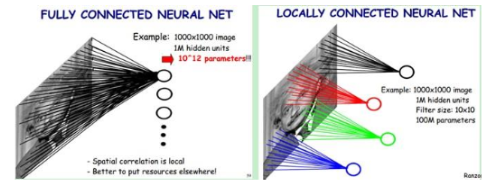

尽管减少了几个数量级，但参数数量依然较多。请看权值共享继续减少参数。
    
    具体做法是，在局部连接中隐藏层的每一个神经元连接的是一个10 ×10的局部图像，因此有10 ×10个权值参数，将这10 ×10个权值参数共享给剩下的神经元，也就是说隐藏层中10^6个神经元的权值参数相同，那么此时不管隐藏层神经元的数目是多少，需要训练的参数就是这10 ×10个权值参数（也就是卷积核(也称滤波器)的大小），如下图

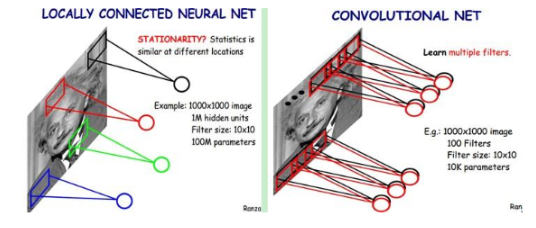

如果要多提取出一些特征，可以增加多个卷积核，不同的卷积核能够得到图像的不同映射下的特征，称之为Feature Map。如果有100个卷积核，最终的权值参数也仅为100 ×100 = 10^4个而已。另外，偏置参数也是共享的，同一种滤波器共享一个

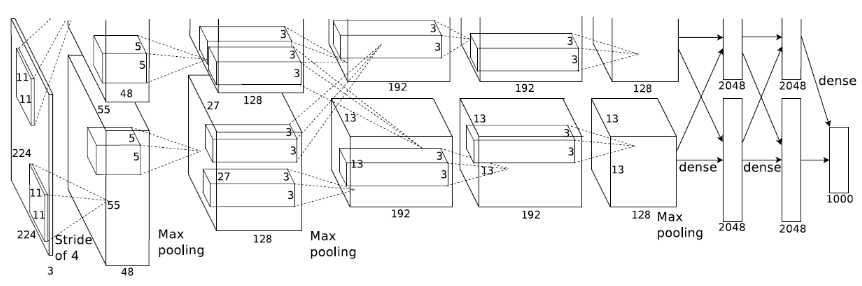

### 卷积

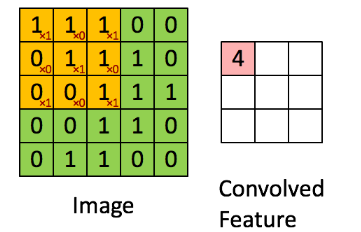

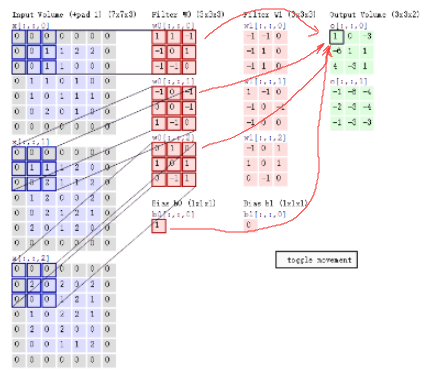
多channel

卷积层是卷积核在上一级输入层上通过逐一滑动窗口计算而得，卷积核中的每一个参数都相当于传统神经网络中的权值参数，与对应的局部像素相连接，将卷积核的各个参数与对应的局部像素值相乘之和，（通常还要再加上一个偏置参数），得到卷积层上的结果。
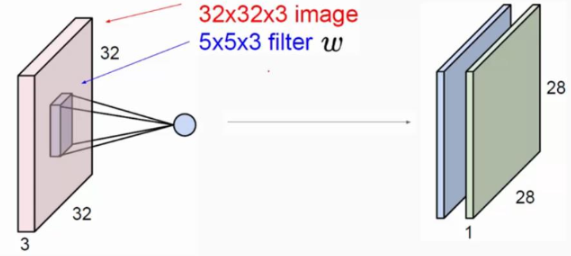

输入图像是32\*32\*3，3是它的深度（即R、G、B），卷积层是一个5\*5\*3的filter(<span class="mark">感受野</span>)，这里注意：感受野的深度必须和输入图像的深度相同。通过一个filter与输入图像的卷积可以得到<span class="mark">一个28\*28\*1的特征图</span>，上图是用了两个filter得到了两个特征图

### 激活函数

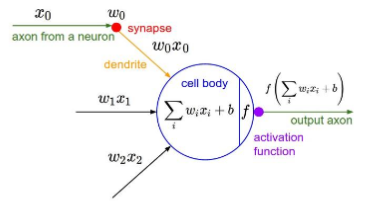

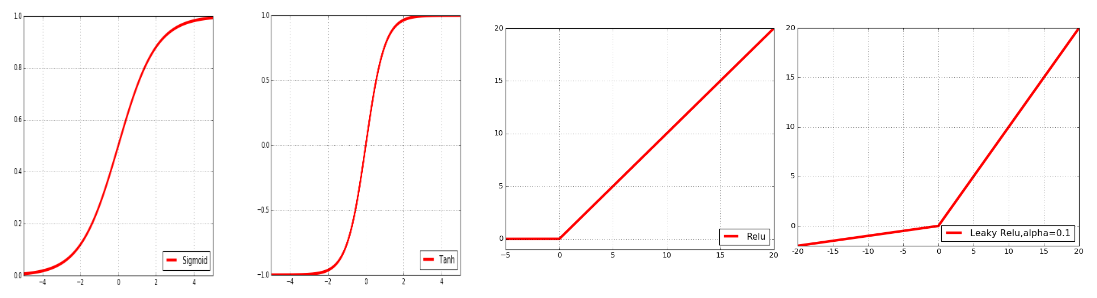

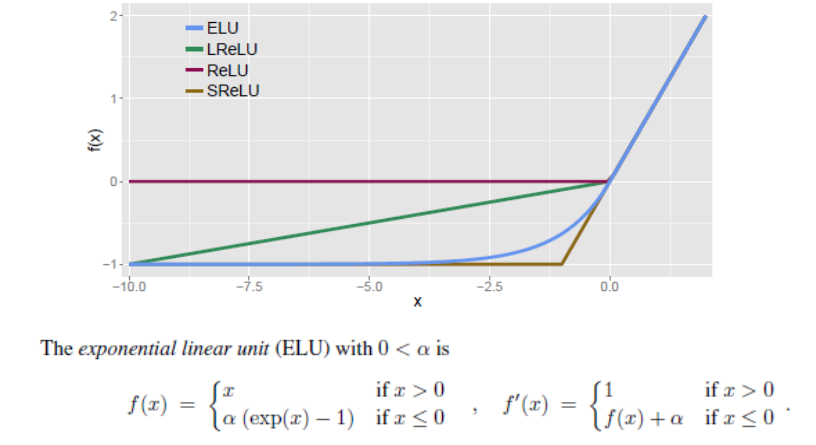

### 池化层

在池化层中，进行压缩减少特征数量的时候一般采用两种策略

- Max Pooling：最大池化，一般采用该方式
- Average Pooling：平均池化
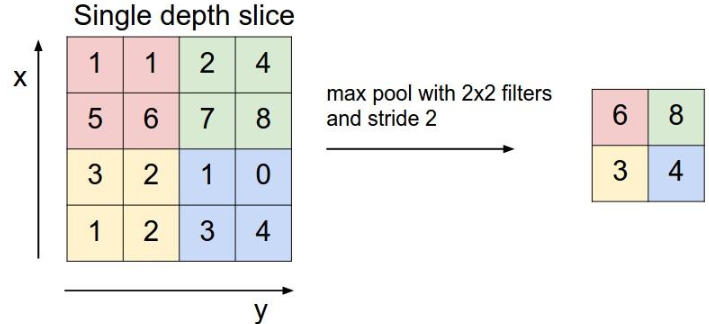

### 正则化和dropout

- Regularization：正则化，通过降低模型的复杂度，通过在cost函数上添加一个正则项的方式来降低overfitting，主要有L1和L2两种方式。
- Dropout：通过随机删除神经网络中的神经元来解决overfitting问题，在每次迭代的时候，只使用部分神经元训练模型获取W和b的值

    对于同一组训练数据，利用不同的神经网络训练之后，求其输出的平均值可以减少过拟合。Dropout就是利用这个原理，每次丢掉一半左右的隐藏层神经元，相当于在不同的神经网络上进行训练，这样就减少了神经元之间的依赖性，即每个神经元不能依赖于某几个其它的神经元（指层与层之间相连接的神经元），使神经网络更加能学习到与其它神经元之间的更加健壮robust（鲁棒性）的特征。另外Dropout不仅减少过拟合，还能提高准确率。

正则化是通过给cost函数添加正则项的方式来解决过拟合，Dropout是通过直接修改神经网络的结构来解决过拟合。

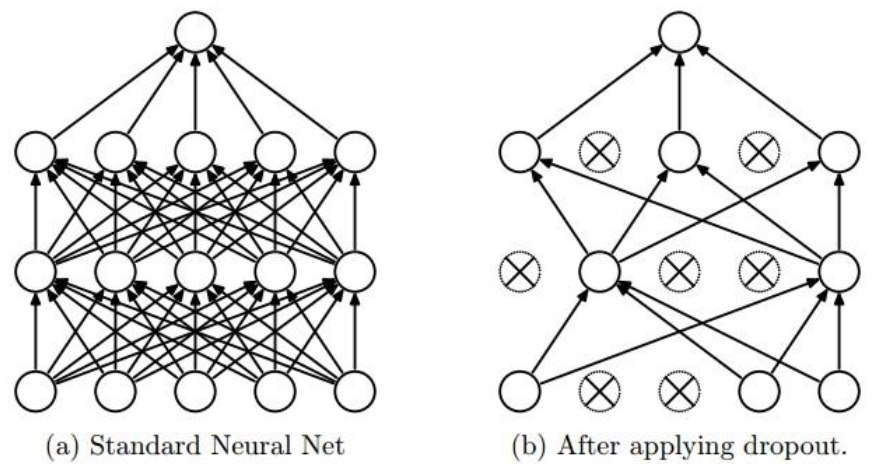

### 池化层误差反向传播

Maxpool池化层反向传播，<span class="mark">除最大值处继承上层梯度外，其他位置置零</span>

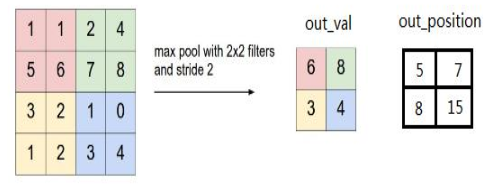

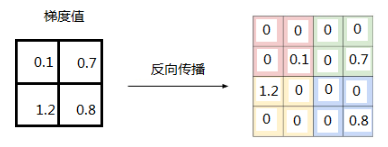

平均池化，我们需要把残差平均分成2*2=4份，传递到前边小区域的4个单元即可

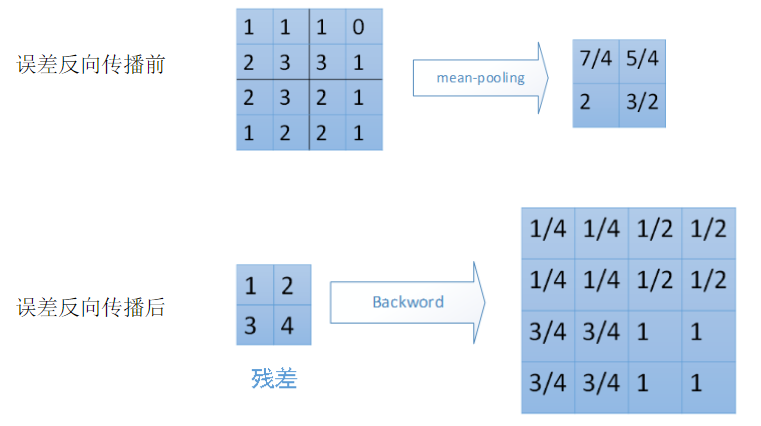

### Zero Padding

图片做完卷积操作后保持图片大小不变，所以我们一般会选择尺寸为3\*3的卷积核和1的zero padding，或者5\*5的卷积核与2的zero padding，这样通过计算后，可以保留图片的原始尺寸。那么加入zero padding后的

feature_map尺寸=( width + 2 * padding_size -filter_size )/stride + 1

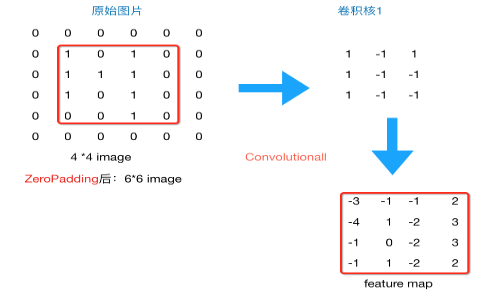

### Flatten层& Fully Connected Layer

做完Max Pooling后，我们就会把这些数据“拍平”，丢到Flatten层，然后把Flatten层的output放到full connected Layer里，采用softmax对其进行分类

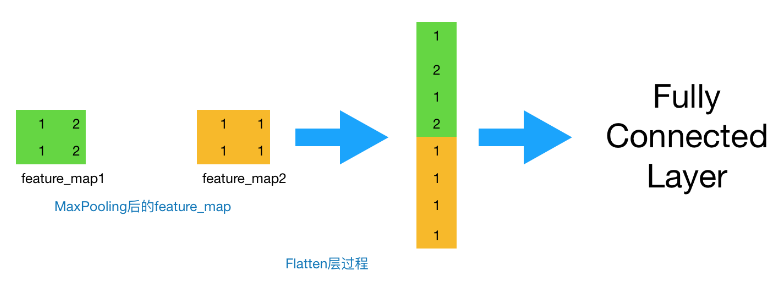